In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'darkgrid')

In [56]:
data = pd.read_csv('automobile.csv')

data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [58]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [59]:
data.shape

(202, 26)

In [60]:
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [72]:
#replace missing values: mode for categorical and median or mean for numerical
for i in data.columns:
    if ((data[i].isnull().sum() / len(data)) *100) < 30:
      if data[i].dtypes != 'O':
        data[i].fillna(data[i].median(), inplace=True)
      else:
        data[i].fillna(data[i].mode()[0], inplace=True)

    else:
        data.drop(i, axis=1, inplace=True)

data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [62]:
num = data.select_dtypes(include = ['number'])
cat = data.select_dtypes(exclude = ['number'])
print('num.columns')
display(num.head())
print('\ncategorical columns:')
display(cat.head())

num.columns


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450



categorical columns:


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


In [71]:
data['peak-rpm'] = data['peak-rpm'].replace( ' ', 0)
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce')
data['peak-rpm'].dtypes

dtype('float64')

In [73]:
#knowing the columns to scale
cols_to_scale = []
for i in num.columns:
    if data[i].describe()[2] > 1500:
        cols_to_scale.append(i)


cols_to_scale

['price']

In [74]:
# to encode categorical datas
from sklearn.preprocessing import LabelEncoder
import joblib

encoded = {}
for i in cat.columns:
    encode = LabelEncoder()
    data[i] = encode.fit_transform(data[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i + 'encoder'] = encode

encoded

{'makeencoder': LabelEncoder(),
 'fuel-typeencoder': LabelEncoder(),
 'aspirationencoder': LabelEncoder(),
 'num-of-doorsencoder': LabelEncoder(),
 'body-styleencoder': LabelEncoder(),
 'drive-wheelsencoder': LabelEncoder(),
 'engine-locationencoder': LabelEncoder(),
 'engine-typeencoder': LabelEncoder(),
 'num-of-cylindersencoder': LabelEncoder(),
 'fuel-systemencoder': LabelEncoder(),
 'boreencoder': LabelEncoder(),
 'strokeencoder': LabelEncoder(),
 'horsepowerencoder': LabelEncoder(),
 'peak-rpmencoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

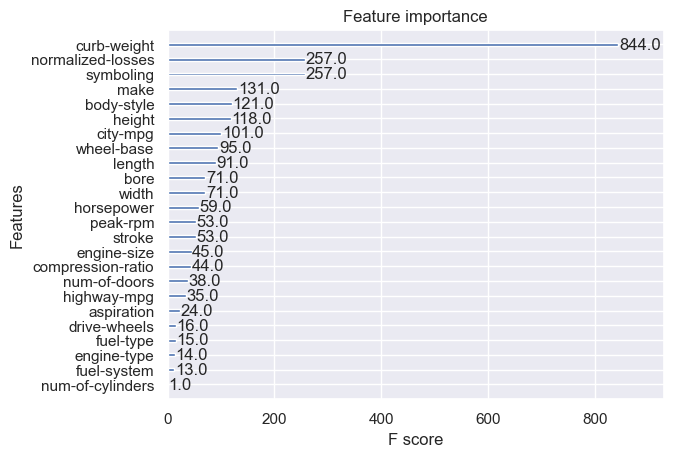

In [75]:
import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBRegressor()

x= data.drop('price', axis = 1)
y = data.price

model.fit(x, y)

#Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [76]:
sel_cols = ['curb-weight', 'symboling', 'normalized-losses', 'make', 'horsepower',
            'height', 'body-style', 'price']

new_data = data[sel_cols]
new_data.head()

,curb-weight,symboling,normalized-losses,make,horsepower,height,body-style,price
0,2548,3,115.0,0,30,48.8,0,13495
1,2548,3,115.0,0,30,48.8,0,16500
2,2823,1,115.0,0,45,52.4,2,16500
3,2337,2,164.0,1,27,54.3,3,13950
4,2824,2,164.0,1,33,54.3,3,17450


In [77]:
#------ Modelling ---------
from sklearn.model_selection import train_test_split

x = new_data.drop('price', axis = 1)
y = new_data.price

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (181, 7)
Xtest: (21, 7)
Ytrain: (181,)
Ytest: (21,)


In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()




log_reg.fit(x, y)

LogisticRegression()

In [79]:
from sklearn.metrics import r2_score

cv = log_reg.predict(xtest)
print(r2_score(cv, ytest))

0.9722213799329341


In [80]:
#Model Saving
joblib.dump(log_reg, open('autoMobilePredmodel.pkl','wb'))